Case Study: Fast Food

The purpose of this case study is to offer another illustration of market segmentation
analysis using a different empirical data set.For this case study, imagine that you are McDonald’s, and you would want to know if consumer segments exist that have a distinctly different image of
McDonald’s. Understanding such systematic differences of brand perceptions by market segments informs which market segments to focus on, and what messages to communicate to them. We can choose to focus on market segments with a positive perception, and strengthen the positive perception. Or we can choose to focus on a market segment that currently perceives McDonald’s in a negative way. In this case,
we want to understand the key drivers of the negative perception, and modify them.

A.1 Step 1: Deciding (not) to Segment
McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

A.2 Step 2: Specifying the Ideal Target Segment

McDonald’s management needs to decide which key features make a market seg-
ment attractive to them. In terms of knock-out criteria, the target segment or target

segments must be homogeneous (meaning that segment members are similar to one
another in a key characteristic), distinct (meaning that members of the segments
differ substantially from members of other segments in a key characteristic), large
enough to justify the development and implementation of a customised marketing
mix, matching the strengths of McDonald’s (meaning, for example, that they must
be open to eating at fast food restaurants rather than rejecting them outright),
identifiable (meaning that there must be some way of spotting them among other
consumers) and, finally, reachable

A.3 Step 3: Collecting Data
The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald’s with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,

HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study con-
ducted in preparation of the survey study. For each of those attributes, respondents

provided either a YES response (indicating that they feel McDonald’s possesses
this attribute), or a NO response

A.4 Step 4: Exploring Data
First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
r_data=pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [3]:
r_data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


As we can see from the output, the first respondent believes that McDonald’s is not
yummy, convenient, not spicy, fattening, not greasy, fast, cheap, not tasty, expensive,
not healthy and not disgusting. This same respondent does not like McDonald’s
(rating of −3), is 61 years old, eats at McDonald’s every three months and is female.
This quick glance at the data shows that the segmentation variables (perception
of McDonald’s) are verbal, not numeric. This means that they are coded using
the words YES and NO. This is not a suitable format for segment extraction. We
need numbers, not words. To get numbers, we store the segmentation variables in a
separate matrix, and convert them from verbal YES/NO to numeric binary.

In [4]:
r_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
r_data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
r_data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


First we extract the first eleven columns from the data set because these columns
contain the segmentation variables, and convert the data to a matrix. Then we
identify all YES entries in the matrix. This results in a logical matrix with entries
TRUE and FALSE. Adding 0 to the logical matrix converts TRUE to 1, and FALSE
to 0. We check that we transformed the data correctly by inspecting the average
value of each transformed segementation variable.

In [7]:
data=r_data.iloc[:,:11]
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [8]:
data=(data=='Yes').astype(int)
col_mean=np.mean(data,axis=0)
rounded_col_mean=np.round(col_mean,2)

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

In [9]:
rounded_col_mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

Another way of exploring data initially is to compute a principal components
analysis, and create a perceptual map. A perceptual map offers initial insights into
how attributes are rated by respondents and, importantly, which attributes tend to be
rated in the same way. Principal components analysis is not computed to reduce the
number of variables. This approach – also referred to as factor-cluster analysis – is
inferior to clustering raw data in most instances (Dolnicar and Grün 2008). Here, we
calculate principal components because we use the resulting components to rotate
and project the data for the perceptual map. We use unstandardised data because our
segmentation variables are all binary.

In [10]:
from sklearn.decomposition import PCA

In [11]:
data_pca=PCA().fit(data)
print(data_pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [12]:
print(np.around(data_pca.get_covariance(), decimals=1))

[[ 0.2  0.   0.  -0.  -0.   0.   0.   0.2 -0.   0.  -0.1]
 [ 0.   0.1  0.   0.  -0.   0.   0.   0.  -0.   0.  -0. ]
 [ 0.   0.   0.1 -0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.   0.  -0.   0.1  0.1  0.  -0.  -0.   0.  -0.   0. ]
 [-0.  -0.   0.   0.1  0.2 -0.  -0.  -0.   0.  -0.   0.1]
 [ 0.   0.   0.   0.  -0.   0.1  0.   0.  -0.   0.  -0. ]
 [ 0.   0.   0.  -0.  -0.   0.   0.2  0.  -0.2  0.  -0. ]
 [ 0.2  0.   0.  -0.  -0.   0.   0.   0.2 -0.   0.  -0.1]
 [-0.  -0.   0.   0.   0.  -0.  -0.2 -0.   0.2 -0.   0. ]
 [ 0.   0.   0.  -0.  -0.   0.   0.   0.  -0.   0.2 -0. ]
 [-0.1 -0.   0.   0.   0.1 -0.  -0.  -0.1  0.  -0.   0.2]]


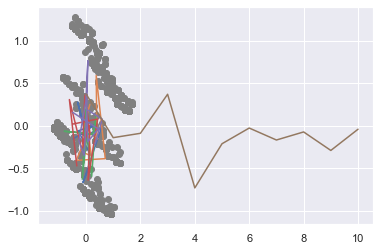

In [13]:
plt.scatter(data_pca.transform(data)[:,0],data_pca.transform(data)[:,1],c='grey')
plt.plot(*data_pca.components_.T)
plt.show()

These initial exploratory insights represent valuable information for segment
extraction. Results indicate that some attributes are strongly related to one another,
and that the price dimension may be critical in differentiating between groups of
consumers.

A.5.1 Using k-Means
We calculate solutions for two to eight market segments using standard k-means
analysis with ten random restarts (argument nrep). We then relabel segment numbers such that they are consistent across segmentations.We extract between two and eight segments because we do not know in advancewhat the best number of market segments is. If we calculate a range of solutions, we can compare them and choose the one which extracts segments containing similar consumers which are distinctly different from members of other segments.

In [14]:
from sklearn.utils import check_random_state

In [15]:
np.random.seed(1234)
results =[]
for i in range(2, 9):
    best_inertia =np.inf
    for j in range(10):
        kmeans =KMeans(n_clusters=i, random_state=check_random_state(j)).fit(data)
        if kmeans.inertia_<best_inertia:
            best_kmeans =kmeans
            best_inertia =kmeans.inertia_
    results.append(best_kmeans)

data_km28 =results[-1]


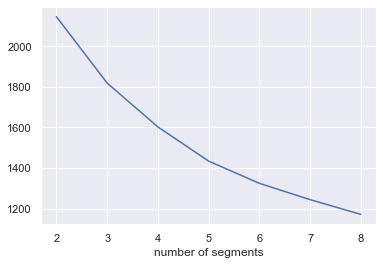

In [16]:
plt.plot(range(2, 9), [km.inertia_ for km in results])
plt.xlabel('number of segments')
plt.show()

A.5.2 Using Mixtures of Distributions
We calculate latent class analysis using a finite mixture of binary distributions.
The mixture model maximises the likelihood to extract segments (as opposed to
minimising squared Euclidean distance, as is the case for k-means).

In [17]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)
results =[]
for i in range(2, 9):
    best_score =-np.inf
    for j in range(10):
        gmm =GaussianMixture(n_components=i, random_state=check_random_state(j)).fit(data)
        score=gmm.score(data)
        if score > best_score:
            best_gmm =gmm
            best_score =score
    results.append(best_gmm)

data_m28=results[-1]

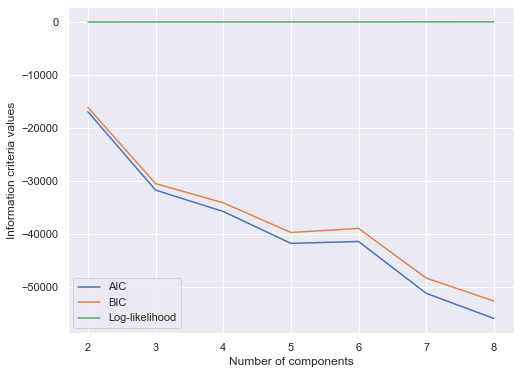

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.utils import check_random_state

np.random.seed(1234)

results =[]
for i in range(2, 9):
    best_score =-np.inf
    for j in range(10):
        gmm =GaussianMixture(n_components=i, random_state=check_random_state(j)).fit(data)
        score =gmm.score(data)
        if score>best_score:
            best_gmm =gmm
            best_score =score
    results.append(best_gmm)

n_components =np.arange(2, 9)
aic =[model.aic(data) for model in results]
bic =[model.bic(data) for model in results]
log_likelihood =[model.score(data) for model in results]

fig, ax =plt.subplots(figsize=(8, 6))
ax.plot(n_components, aic, label='AIC')
ax.plot(n_components, bic, label='BIC')
ax.plot(n_components, log_likelihood, label='Log-likelihood')
ax.set_xlabel('Number of components')
ax.set_ylabel('Information criteria values')
ax.legend()
plt.show()